In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.utils.data as Data
plt.rcParams["figure.figsize"] = (20,10)

In [54]:
data=pd.read_csv("/content/motor_data.csv", usecols=['voltage','current','velocity'])
data.head()

,voltage,current,velocity
0,0.000000,0.003070,0.000000
1,0.224906,0.001535,0.000000
2,0.449250,0.000000,0.000000
3,0.672472,0.006140,0.000000
4,0.894012,0.007675,32.724926


In [55]:
scaler = MinMaxScaler(feature_range=(-1, 1))
data=scaler.fit_transform(data)
data


array([[-3.44093276e-05, -1.23711003e-01,  3.03030195e-02],
       [ 4.08593695e-02, -1.24999685e-01,  3.03030195e-02],
       [ 8.16509351e-02, -1.26288368e-01,  3.03030195e-02],
       ...,
       [-4.20724248e-01, -1.26288368e-01, -3.33333333e-01],
       [-4.08759405e-01, -1.32731780e-01, -3.93939374e-01],
       [-3.97136372e-01, -1.32731780e-01, -3.33333333e-01]])

In [56]:
data.shape

(2159, 3)

In [57]:
# Swap the 0th and 1st column in the array such that current occurs first and then voltage and 
# then swap the second and third column such that voltage goes to last
data[:, [1, 0]] = data[:, [0, 1]]
data[:, [2, 1]] = data[:, [1, 2]]
data

array([[-1.23711003e-01,  3.03030195e-02, -3.44093276e-05],
       [-1.24999685e-01,  3.03030195e-02,  4.08593695e-02],
       [-1.26288368e-01,  3.03030195e-02,  8.16509351e-02],
       ...,
       [-1.26288368e-01, -3.33333333e-01, -4.20724248e-01],
       [-1.32731780e-01, -3.93939374e-01, -4.08759405e-01],
       [-1.32731780e-01, -3.33333333e-01, -3.97136372e-01]])

In [58]:
# Get only the first two columns
X=data[0:,:2]

In [59]:
X

array([[-0.123711  ,  0.03030302],
       [-0.12499969,  0.03030302],
       [-0.12628837,  0.03030302],
       ...,
       [-0.12628837, -0.33333333],
       [-0.13273178, -0.39393937],
       [-0.13273178, -0.33333333]])

In [60]:
y=data[0:,2]
y

array([-3.44093276e-05,  4.08593695e-02,  8.16509351e-02, ...,
       -4.20724248e-01, -4.08759405e-01, -3.97136372e-01])

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)


(((1727, 2), (1727,)), ((432, 2), (432,)))

In [62]:
# Creating the tensor dataset from the numpy array
X_tensor=torch.from_numpy(X_train).type(torch.float)
Y_tensor=torch.from_numpy(y_train).type(torch.float)
train_dataset=Data.TensorDataset(X_tensor,Y_tensor)

In [63]:
BATCH_SIZE=8
train_loader=Data.DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

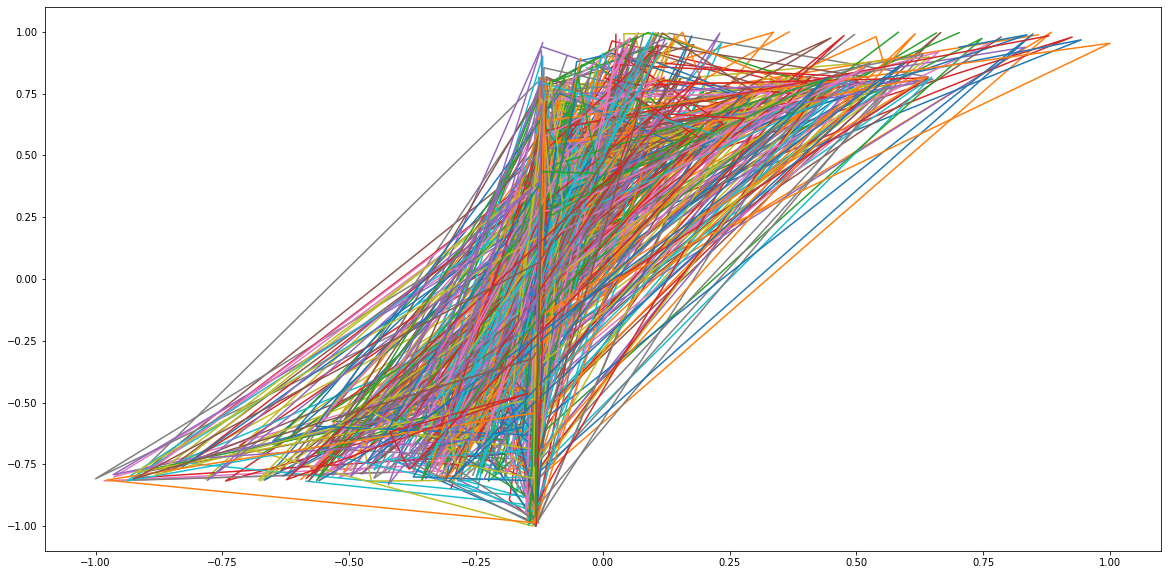

In [64]:
for step,(b_x,b_y) in enumerate(train_loader):
  # print(b_y)
  plt.plot(b_x[:,0],b_y)